# Домашнее задание

Работаем с датасетом про дорожные знаки.

https://www.kaggle.com/datasets/valentynsichkar/traffic-signs-preprocessed/data

В первых двух задачах берем только файл train.pickle и можно подгрузить labels_names.csv

Данные можно прочитать через `pd.read_pickle`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

import seaborn as sns

In [2]:
data = pd.read_pickle('../data/train.pickle')
description = pd.read_csv('../data/label_names.csv')

x = data['features']
y = data['labels']

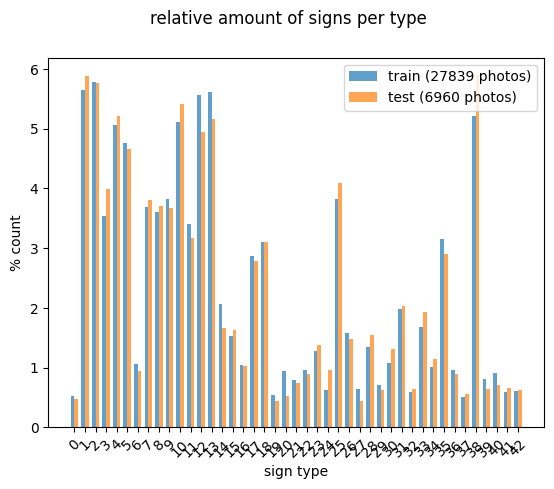

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=113)

def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    counts = 100 * counts[sorted_index] / len(y)
    ylabel_text = '% count'
         
    xtemp = np.arange(len(unique))
     
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('sign type')
    plt.ylabel(ylabel_text)
 
plt.suptitle('relative amount of signs per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_test))
]);


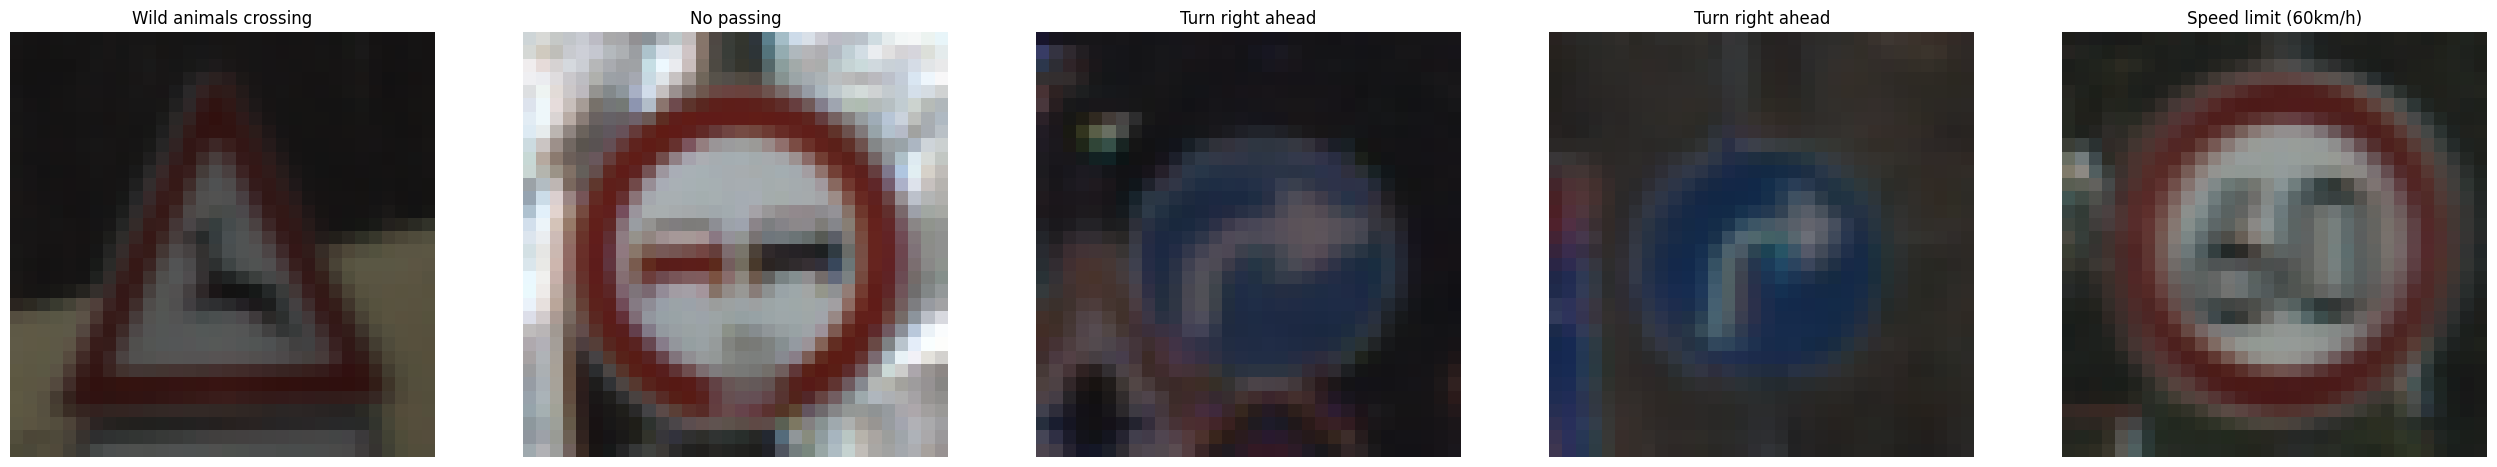

In [4]:
plt.figure(figsize=(32, 32))
for i in range(5):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(description['SignName'][y_train[i]])
    plt.axis('off')

In [5]:
max_iter = 100
max_neighbors = 10
n_jobs = 12


## Easy

Скачать датасет, обучить логистическую регрессию, измерить качество.

Текстом кратко обосновать какую метрику выбираем и почему такую.

Какой вид дорожных знаков модель путает чаще всего?

In [7]:
model_LR = LogisticRegression(max_iter=max_iter, n_jobs=n_jobs)
model_LR.fit(x_train.reshape(x_train.shape[0], -1), y_train)

C:\Users\setday\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [6]:
def show_accuracy(y_test, y_pred):
    print(accuracy_score(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(16, 16))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=description['SignName'], yticklabels=description['SignName'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

0.9232758620689655


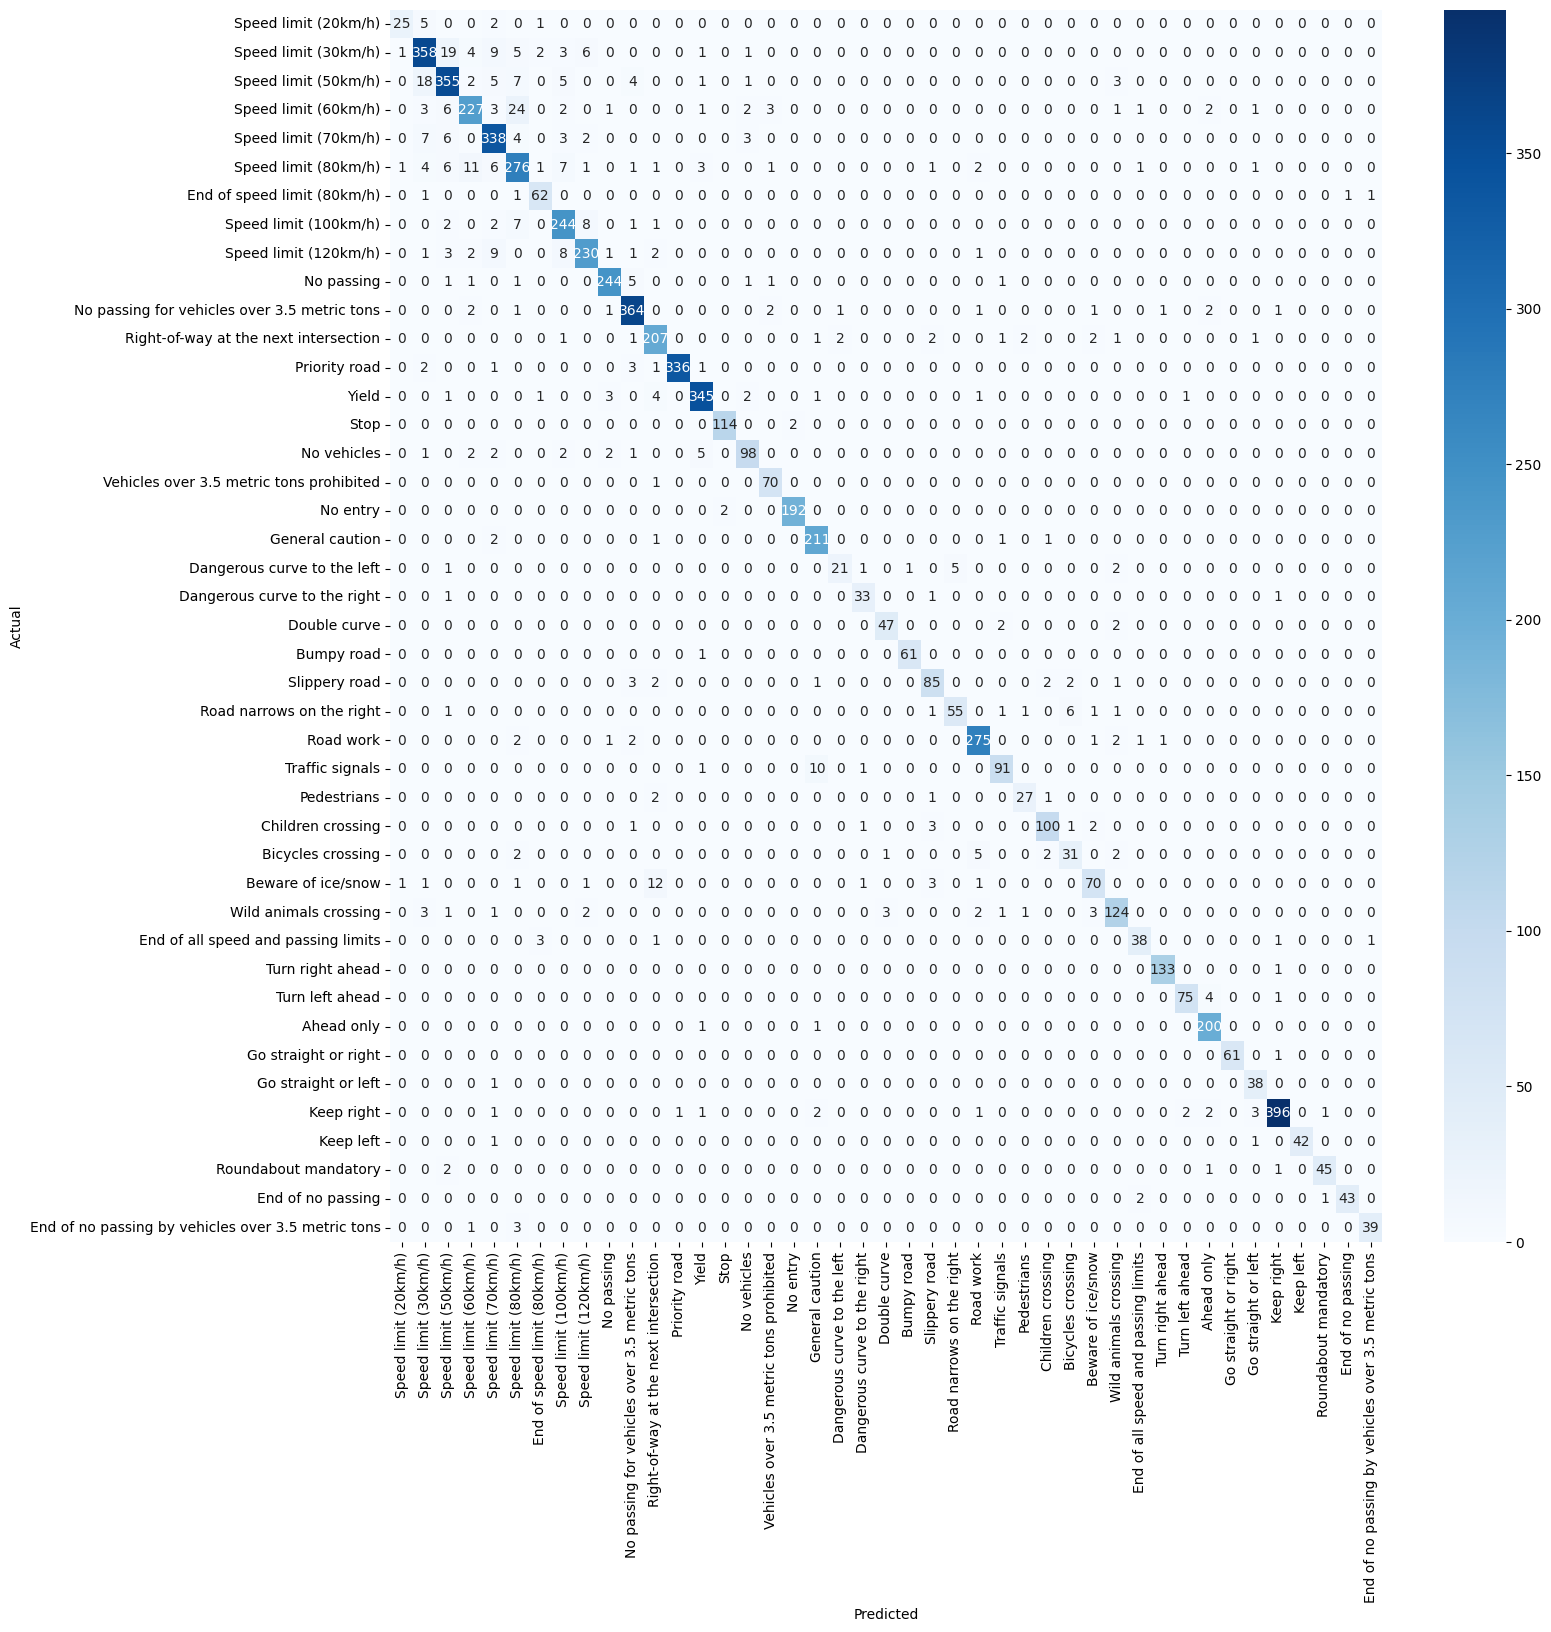

In [8]:
show_accuracy(y_test, model_LR.predict(x_test.reshape(x_test.shape[0], -1)))

Я выбрал обычную метрику `accuracy_score`, но при этом, оценивал модель не по ней, а по матрице `confusion_matrix`.

По сути, данных каждой категории достаточно много, чтобы можно было использовать практически любую метрику репрезентативно. При этом отклонения не столь велики, чтобы метрики кардинально меняли порядок, в зависимости от обучения модели.

Кстати говоря, может показаться, что модель очень часто путает какие-то конкретный знаки, например, `Beware of ice/snow` и `Right-of-way at the next intersection`, однако настоящая анархия происходит при знаках ограничения скорости (т. к. они очень сильно зависят от текста внутри знака, что очень плохо читаем с таким разрешением), хотя по конкретным числам этого и не скажешь.


## Medium

Обучить и сравнить между собой:

- логистическая регрессия
- kNN
- НБК
- SVM (попробовать 3 разных ядра)

Какая модель отработала лучше, а какая хуже всех?

Проинтерпретируйте почему худшая модель именно эта.

In [ ]:
model_KNN = KNeighborsClassifier(n_neighbors=max_neighbors, n_jobs=n_jobs)
model_KNN.fit(x_train.reshape(x_train.shape[0], -1), y_train)

0.825


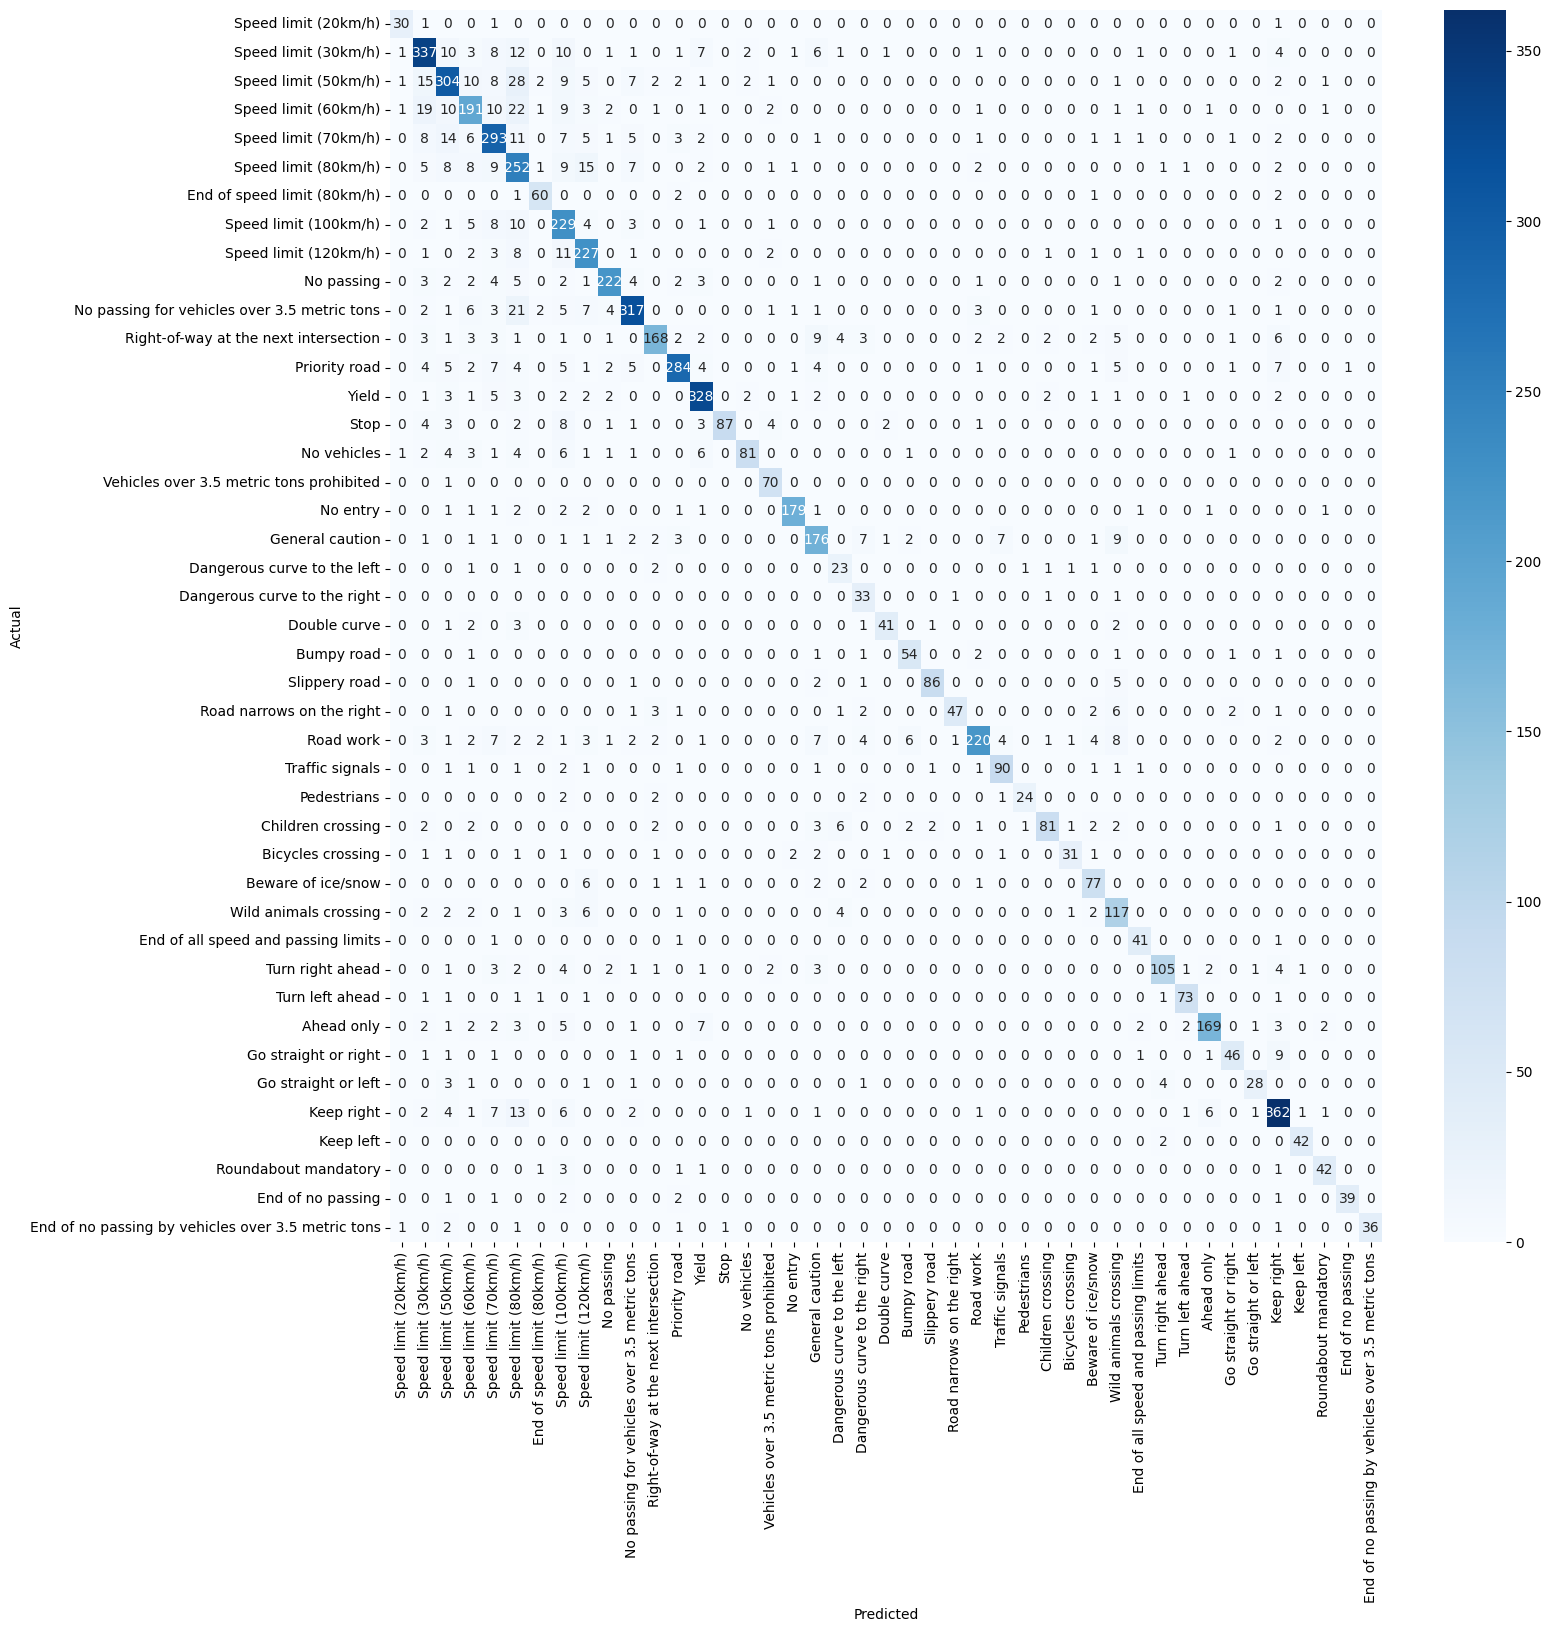

In [9]:
show_accuracy(y_test, model_KNN.predict(x_test.reshape(x_test.shape[0], -1)))

In [ ]:
model_NB = MultinomialNB()
model_NB.fit(x_train.reshape(x_train.shape[0], -1), y_train)

0.3239942528735632


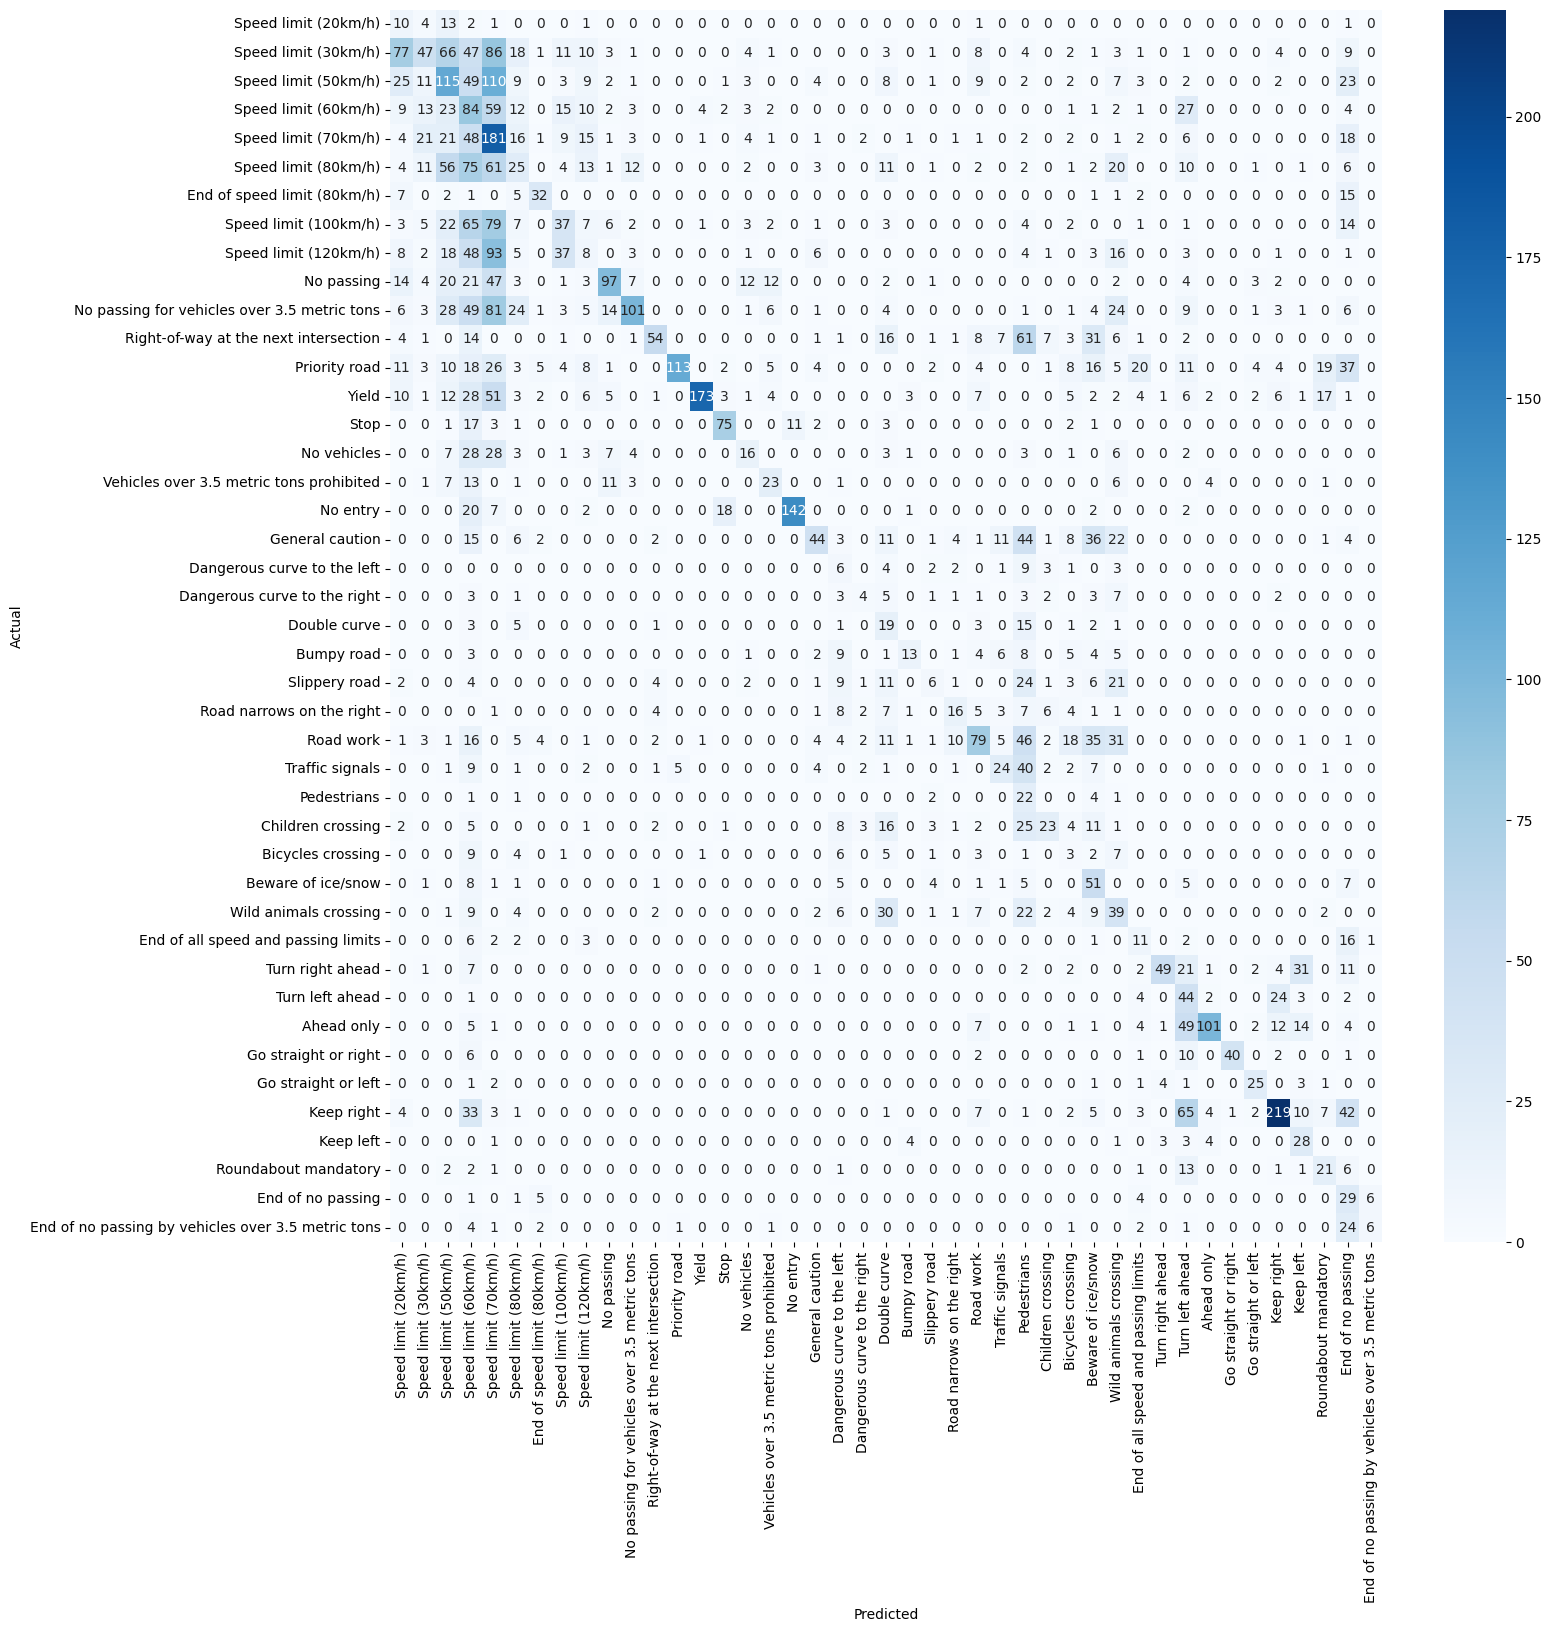

In [10]:
show_accuracy(y_test, model_NB.predict(x_test.reshape(x_test.shape[0], -1)))

In [ ]:
model_SVM_L = SVC(kernel='linear', max_iter=max_iter, cache_size=4000)
model_SVM_L.fit(x_train.reshape(x_train.shape[0], -1), y_train)

C:\Users\setday\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.7432471264367816


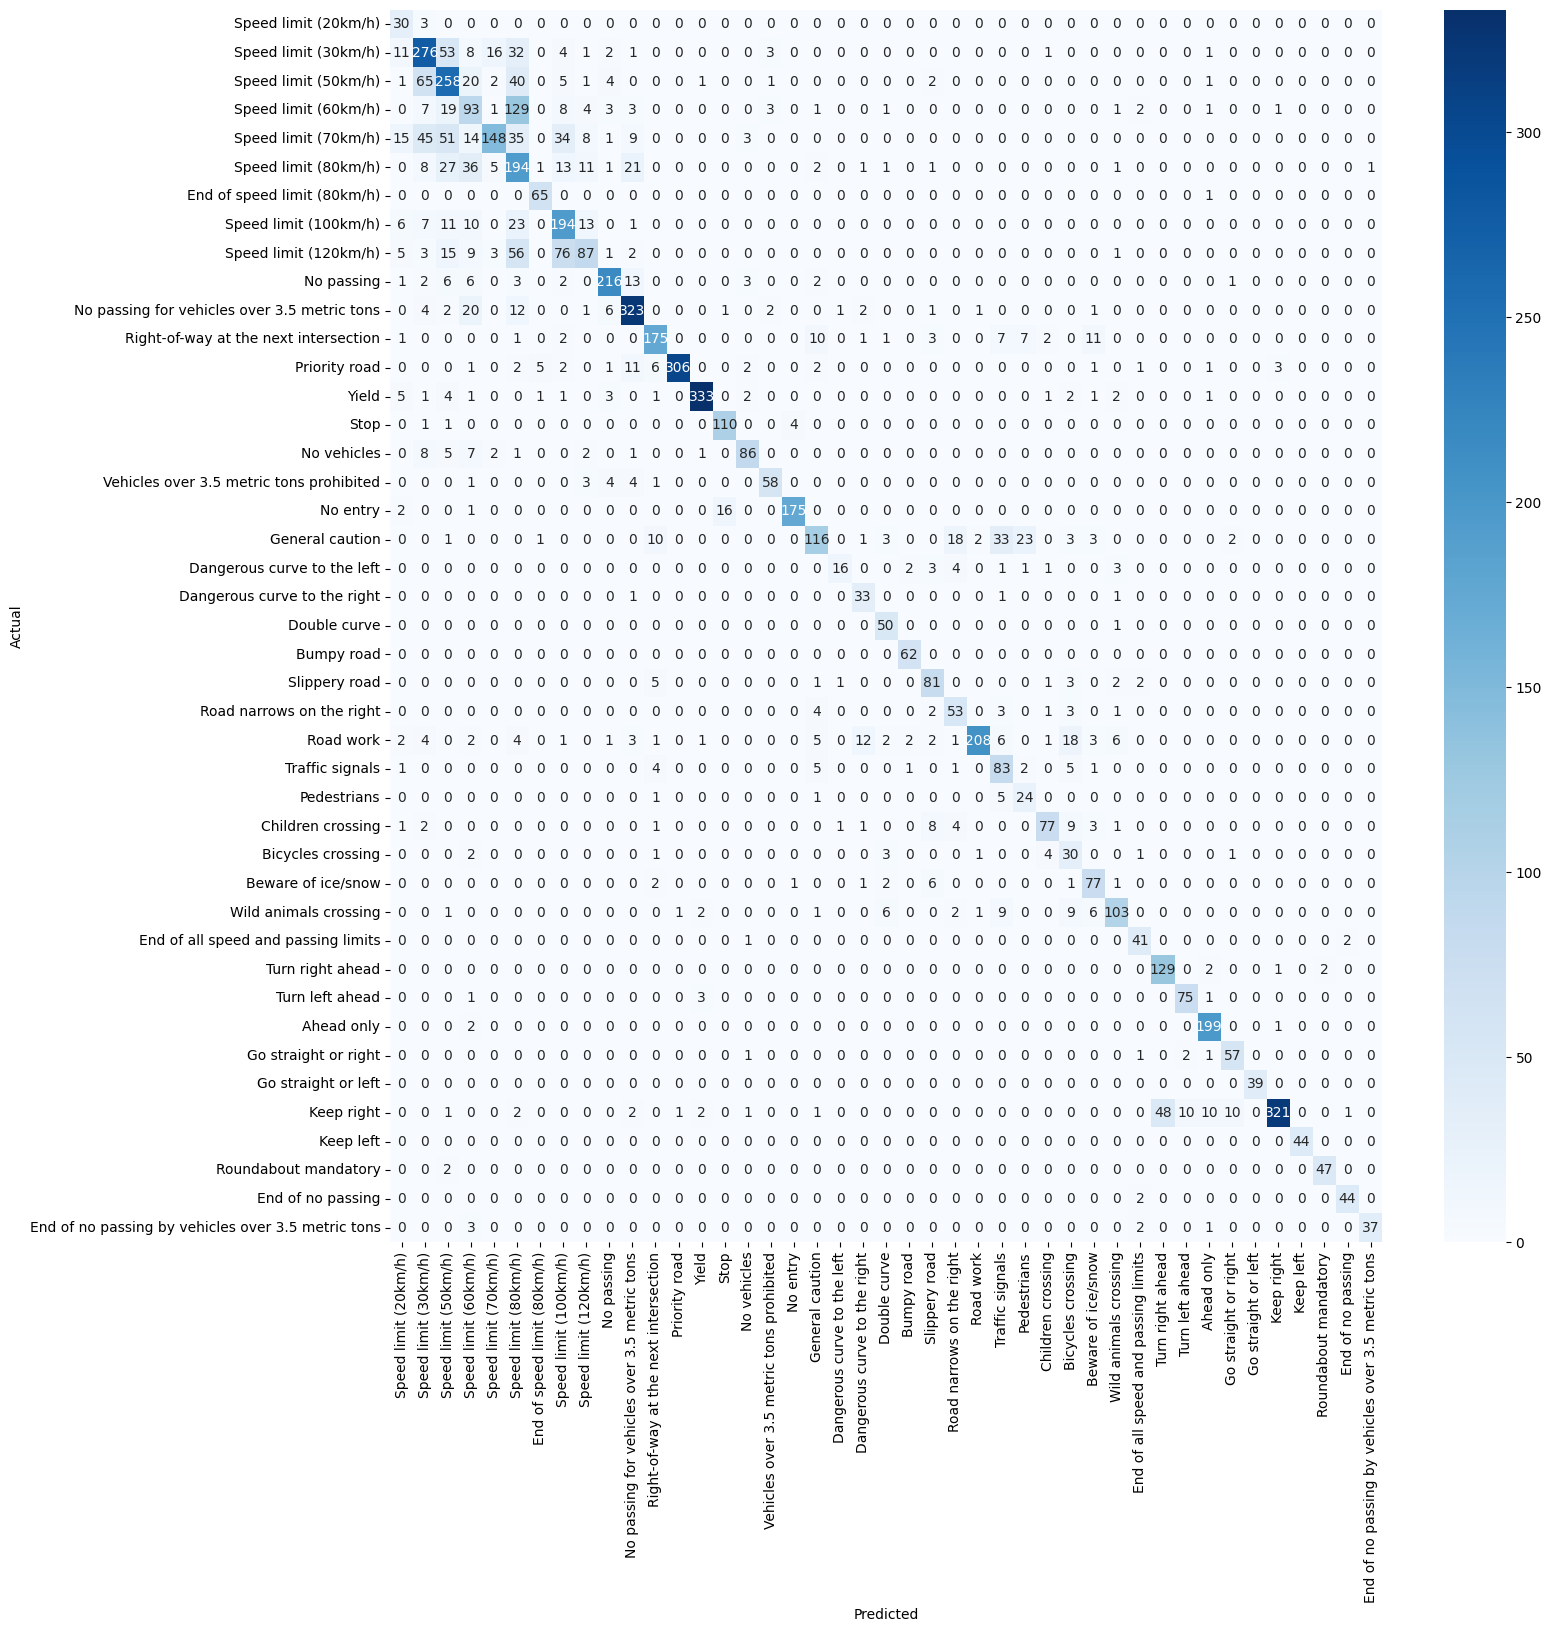

In [11]:
show_accuracy(y_test, model_SVM_L.predict(x_test.reshape(x_test.shape[0], -1)))

In [7]:
model_SVM_P = SVC(kernel='poly', max_iter=max_iter*5, cache_size=4000)
model_SVM_P.fit(x_train.reshape(x_train.shape[0], -1), y_train)

C:\Users\setday\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(cache_size=4000, kernel='poly', max_iter=500)

0.5975574712643679


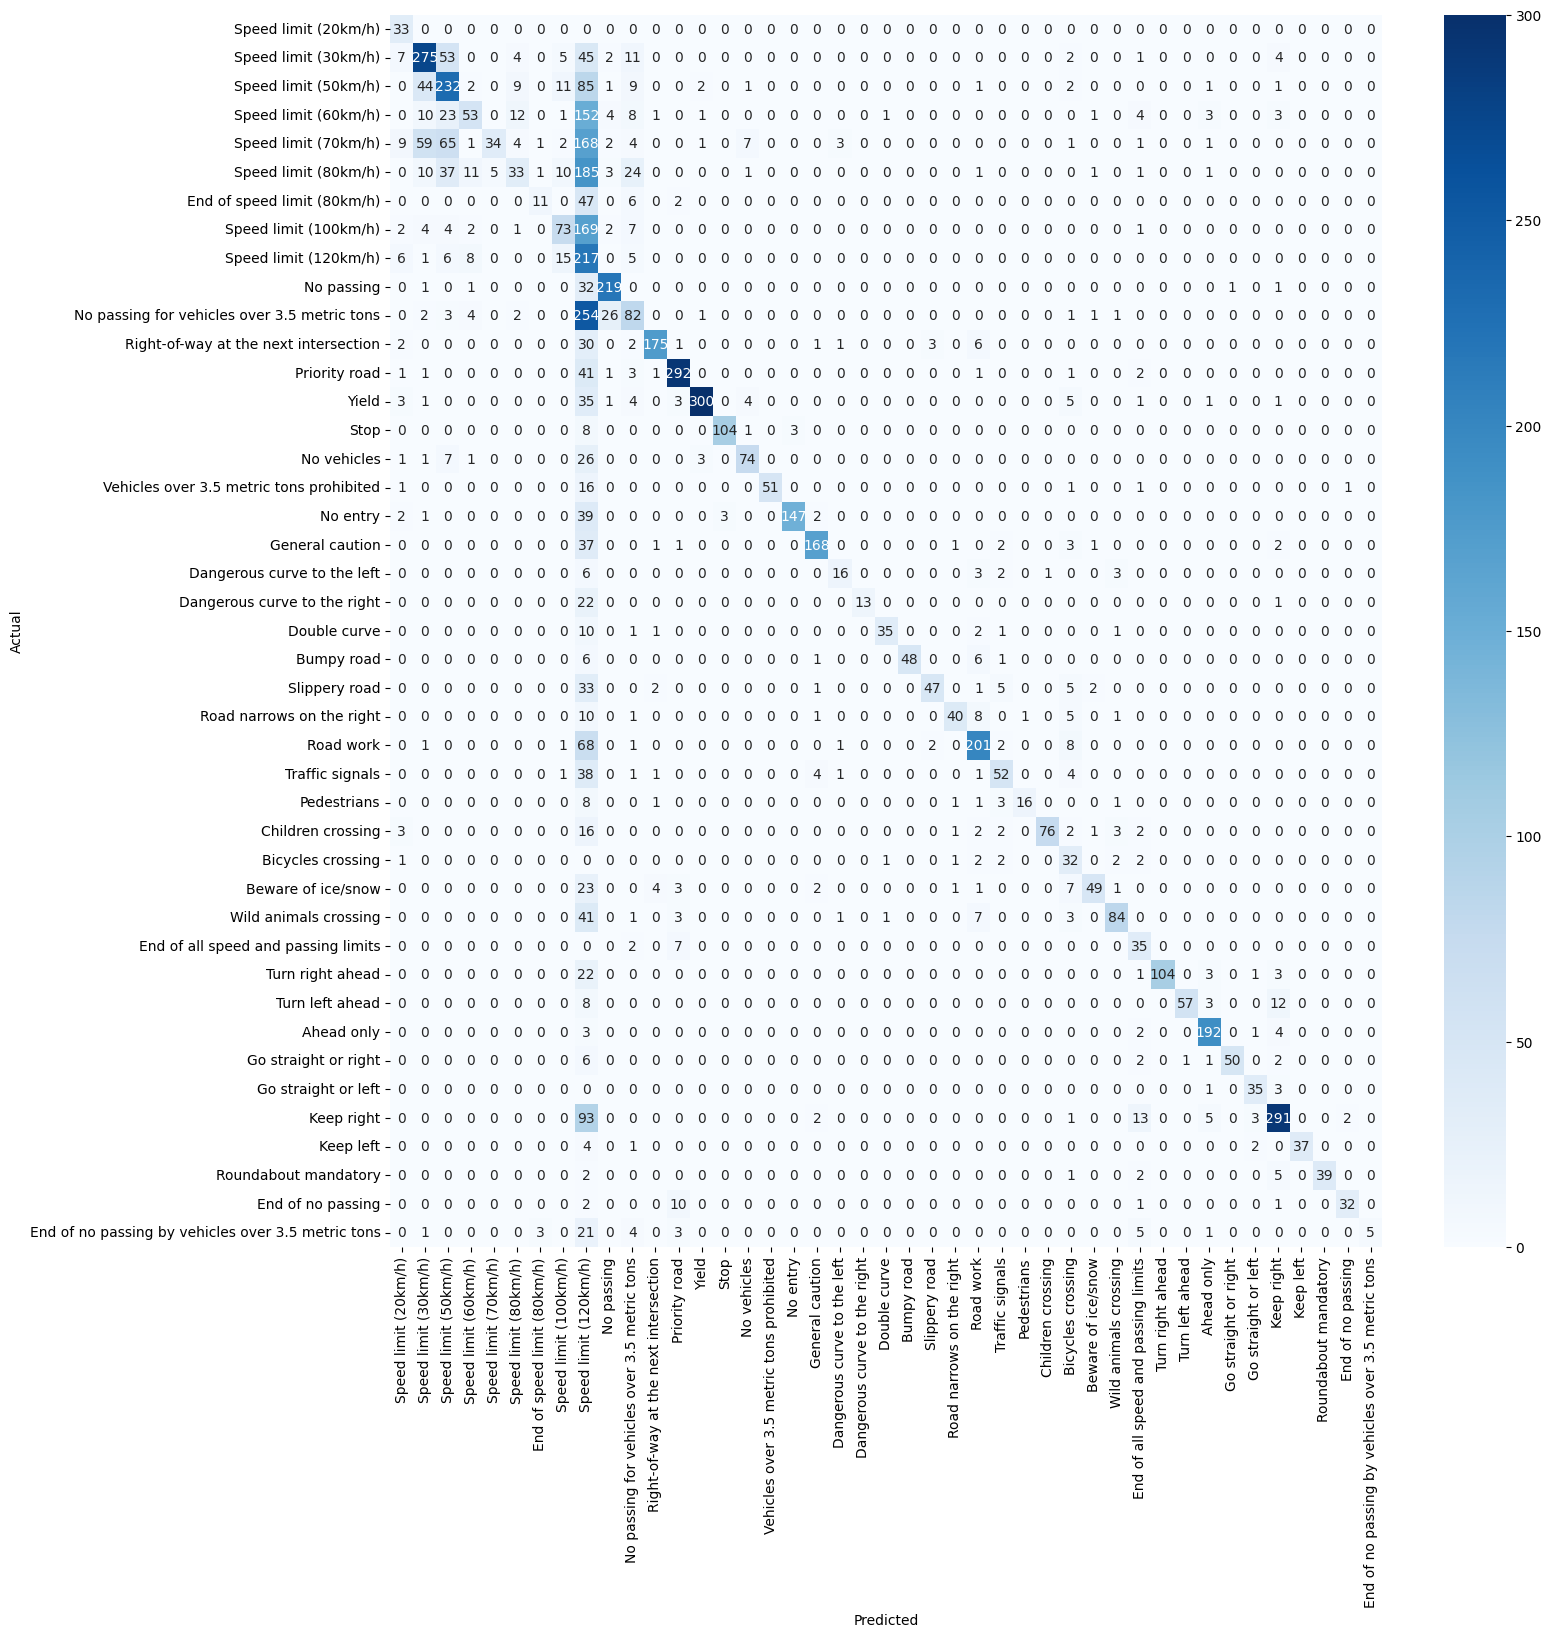

In [8]:
show_accuracy(y_test, model_SVM_P.predict(x_test.reshape(x_test.shape[0], -1)))

In [9]:
model_SVM_R = SVC(kernel='rbf', max_iter=max_iter*5, cache_size=4000)
model_SVM_R.fit(x_train.reshape(x_train.shape[0], -1), y_train)

C:\Users\setday\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(cache_size=4000, max_iter=500)

0.8507183908045977


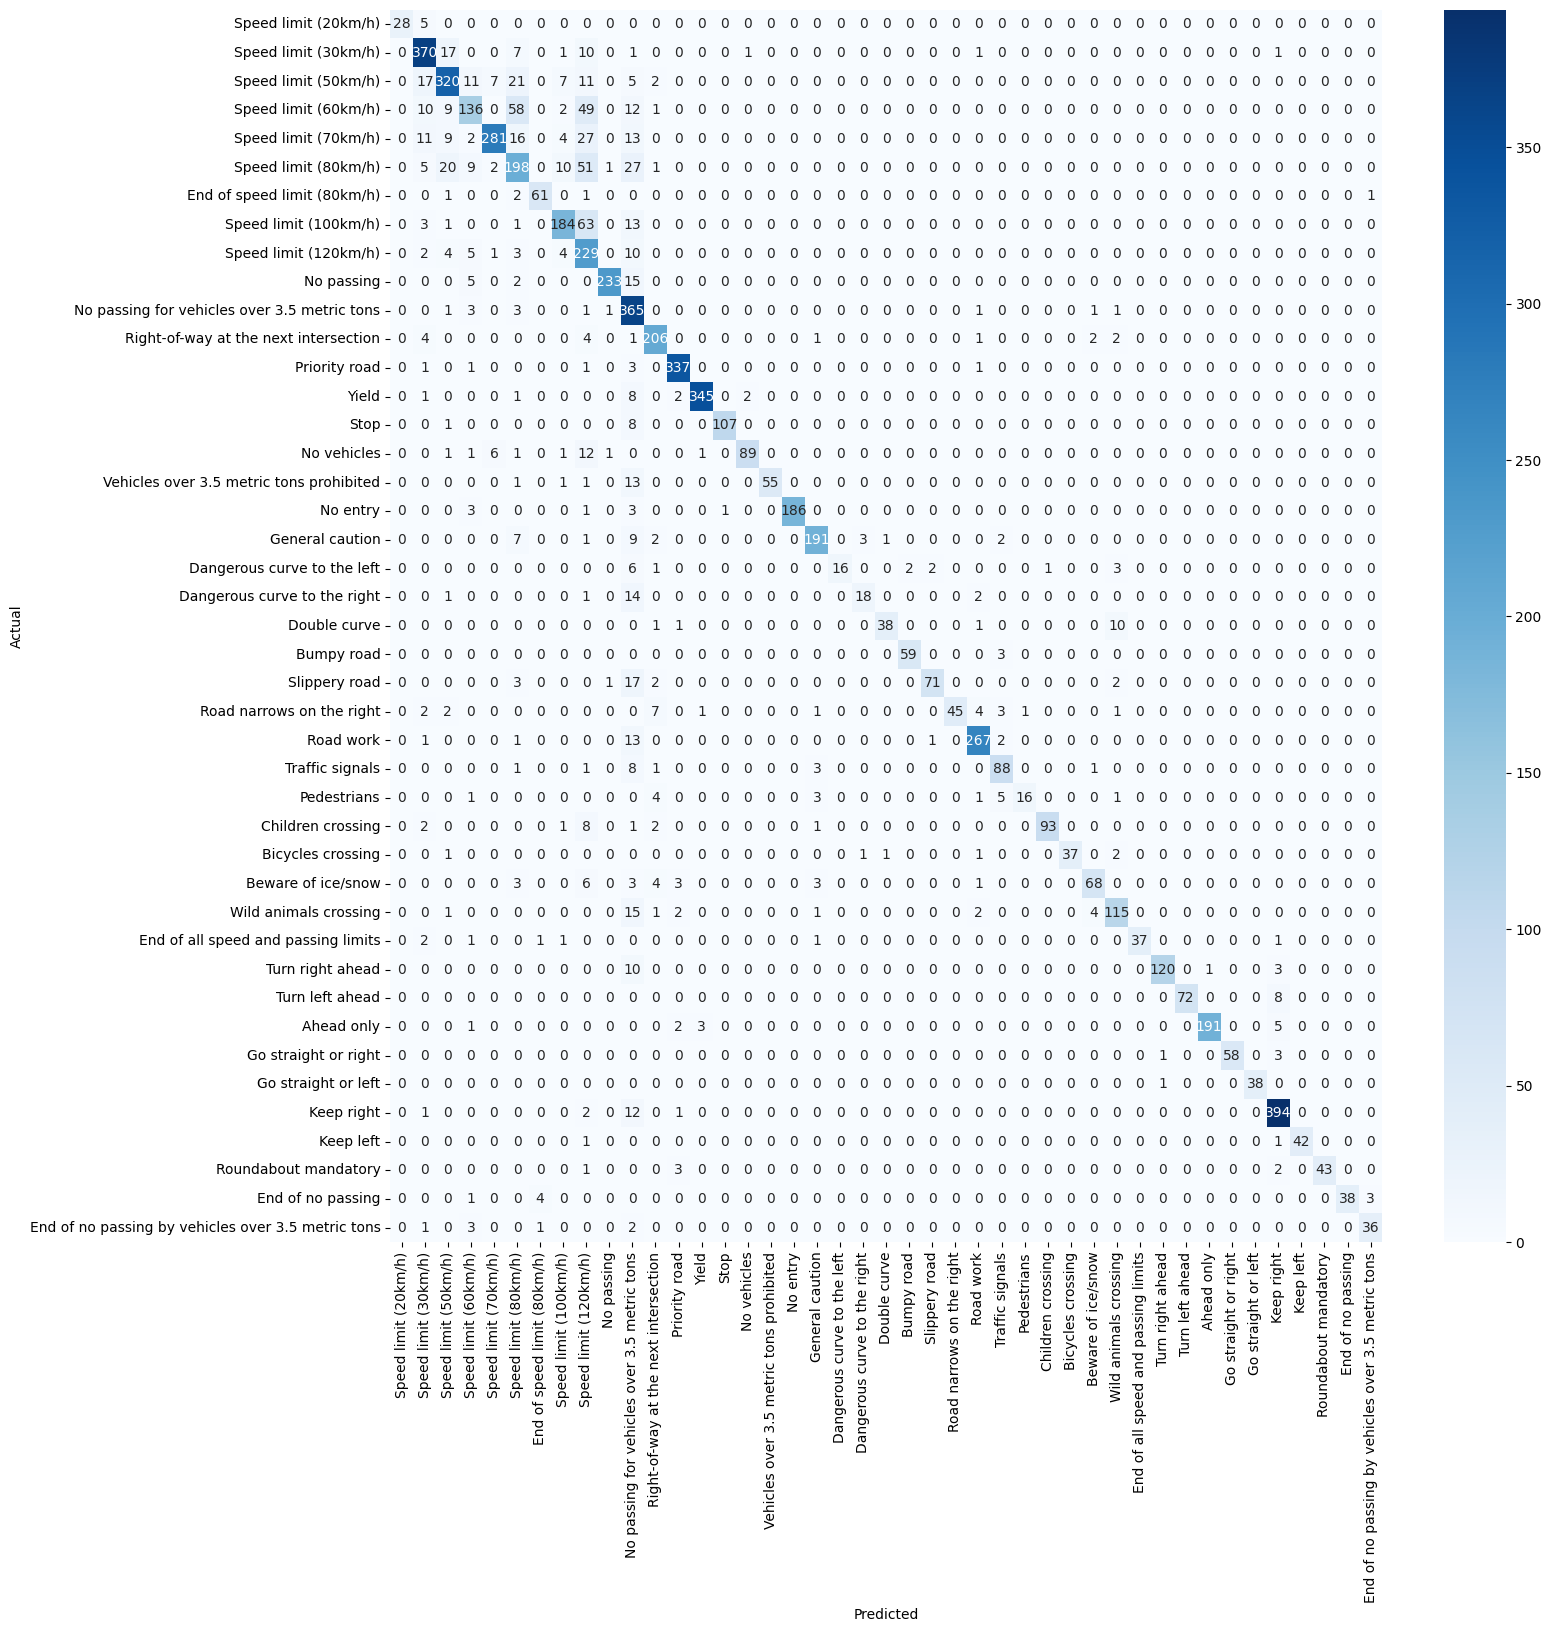

In [10]:
show_accuracy(y_test, model_SVM_R.predict(x_test.reshape(x_test.shape[0], -1)))

В целом результаты довольно очевидны:

1. Логистическая регрессия
2. KNN (тут лажа возникала в области ограничений скорости, т. к. классы этих знаков очень близки друг к другу)
5. SVN - RBF (разброс схож с KNN, но чуть-чуть просиживается та же проблема, что и у полинома; вроде как должно решаться продолжением обучения)
3. SVN - линейка (тут модельке было очень сложно разграничить классы скоростных ограничений, т. к. их признаки очень схожи)
4. SVN - полином (видимо из-за малого числа итераций, разброс внешней области (ограничение на 120) слишком велик, из-за чего в ней очень часто попадают лишние знаки)
6. НБК (тут всё довольно плохо почти везде, что не удивительно, ибо неверно предположение о независимости характеристик; знаки весьма похожи друг на друга по цветам и нужно отличать именно надписи, которые весьма похожи ввиду малого разрешения)


## Hard

Вы - ML-инженер в команде беспилотных автомобилей! Ваша следующая цель - сделать алгоритм, который будет распознавать дорожные знаки. Другая команда уже позаботилась о подготовке данных - вам приходят обрезанные картинки 32х32. Но есть проблема - разметка стоит денег, у проекта есть бюджетные ограничения, но вам готовы выделить тот бюджет, который вы сможете обосновать.

Определите сколько и каких семплов данных необходимо для того, чтобы обучить достаточно хороший алгоритм.

**Подсказка:** При анализе изображений обычно делают специальную предобработку - картинки крутят-вертят, по-разному меняют цвета. Рядом с данными лежит питоновский скрипт, может быть он поможет уменьшить необходимое количество семплов?

Заметим, что не все изменения в картинках нам подойдут, поэтому будем использовать следующие: неслабое вращение (градусов до 20–30), линейная деформация (применять искажение перспективы матрицами трансформации), изменение экспозиции, добавление шума и изменение заднего фона. В таком случае я бы взял где-то 400 задников (просто случайные окружения на задний фон, что можно легко найти в открытом доступе). И порядка 5–10 семплов каждого знака (главное, чтобы они довольно сильно отличались: один совершенно новый, другой чуть выцветший, третий чуть помятый и т. д.).

Т. о. разметка будет крайне дешовой, а датасет исчерпывающим.